In [3]:
import sys
sys.path.append('../../')
from search import search_local
import numpy as np
from tools.tools import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Define parammeters for dividing up Rz space into rectangular bins. All units in kpc.

In [4]:
R_max = 10.
R_min = 5.
z_max = 1.
z_min = -1.
R_pixel = 0.05
z_pixel = 0.01
bin_R = (R_max - R_min)/R_pixel
bin_z = (z_max - z_min)/z_pixel
epsilon = 0.5 # the radius around sun that we assume has most stars

In [5]:
print(bin_R)
print(bin_z)

100.0
200.0


Get gaia catalogue, convert from cartesian to cylindrical

In [6]:
samples = search_local.get_entire_catalogue()
x, y, z, vx, vy, vz = samples.T
cylcoord = rect_to_cyl(x, y, z, vx, vy, vz)
R = cylcoord[:, 0]
z = cylcoord[:, 3]

Get stars close to the sun: epsilon kpc around sun

In [7]:
sun_galactic = np.array([0, 0, 0, 0, 0, 0])
close_stars = search_local.search_phase_space(*sun_galactic, epsilon = epsilon, v_scale = 0)
x_close, y_close, z_close, vx_close, vy_close, vz_close = close_stars.T
cyl_close = rect_to_cyl(x_close, y_close, z_close, vx_close, vy_close, vz_close)
R_close = cyl_close[:, 0]
z_close = cyl_close[:, 3]

Plot 2d histogram of gaia catalogue

Text(0,0.5,'z(kpc)')

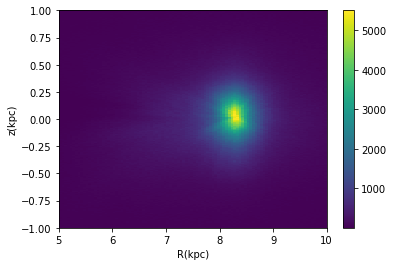

In [8]:
histogram, xedges, yedges, graph = plt.hist2d(R, z, bins = (bin_R, bin_z), range = [[R_min, R_max],[z_min, z_max]])
plt.colorbar()
plt.xlabel('R(kpc)')
plt.ylabel('z(kpc)')

Define a function that get the gaia number density function from histogram result

In [100]:
def n_gaia(Rz):
    R = Rz[0]
    z = Rz[1]
    R_index = ((R-R_min)/R_pixel).astype(int)
    z_index = ((z-z_min)/z_pixel).astype(int)
    result = []
    for i in range(np.size(R_index)):
        print(histogram[R_index[i]][] )
        #result.append(histogram[index[i]])
    return np.array(result)

Define the true number density function; scale length in unit of kpc

In [15]:
def n(Rz, n_0):
    R = Rz[0]
    z = Rz[1]
    return n_0*np.exp(-R/3 - np.abs(z)/0.3)

In [20]:
Rz = np.array([R_close, z_close])
np.shape(Rz)
#curve_fit(n, Rz, n_gaia(Rz))

(2, 1699708)

In [101]:
a=np.array([8.,8.1,8.2,8.3])
b=np.array([0.,0.1,0.2,0.3])
ab = np.array([a,b])
n_gaia(ab)

[ 60 100]


IndexError: index 100 is out of bounds for axis 0 with size 100

In [102]:
histogram[60,100]

2570.0